Dave Gagliano

CIS 2532 NET01

Professor Shamsuddin

06 May 2022

<hr>
These programs are excercises in deep learning

from: <code>https://medium.com/intuitive-deep-learning/build-your-first-convolutional-neural-network-to-recognize-images-84b9c78fe0ce</code>
<hr>

<h2>Build Your First Neural Network to Predict House Prices with Keras</h2>

from: <code>https://medium.com/intuitive-deep-learning/build-your-first-neural-network-to-predict-house-prices-with-keras-eb5db60232c</code>

sections and images in this program taken from this article 

In [1]:
import pandas as pd

In [2]:
# file downloaded from zillow
# https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view
# read csv file and create pandas dataframe
filename = 'housepricedata.csv'
df = pd.read_csv(filename)

In [3]:
# view dataframe
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
# convert data to arrays for machine to process
dataset = df.values

In [5]:
# view dataset
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
# load all rows and columns 0-9 into X
# load all rows and column 10 into Y
X = dataset[:, 0:10]
Y = dataset[:, 10]

In [7]:
# scale data for initiallization of neural network
from sklearn import preprocessing

In [8]:
# min_max scaler scales dataset so that all the input features lie between 0 and 1, inclusive
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
# view scaled data in X_scale
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
# split dataset into a training set and a test set
from sklearn.model_selection import train_test_split

In [11]:
# split dataset
# val_and_test size will be 30% of the overall dataset
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
# create a seperate validation set and test set by splitting val_and_set
# split the val_and_test size evenly to validation and test sets
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

<code>6 valiables for the dataset:   
    X_train (10 input features, 70% of full dataset)
    X_val (10 input features, 15% of full dataset)
    X_test (10 input features, 15% of full dataset)
    Y_train (1 label, 70% of full dataset)
    Y_val (1 label, 15% of full dataset)
    Y_test (1 label, 15% of full dataset)</code>

In [13]:
# view the shapes of the arrays 
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


<strong>data is finally ready!</strong>

<code>Summary: In processing the data, we’ve:
    Read in the CSV (comma separated values) file and convert them to arrays.
    Split our dataset into the input features and the label.
    Scale the data so that the input features have similar orders of magnitude.
    Split our dataset into the training set, the validation set and the test set.</code>

<hr>
<code>Building and Training our First Neural Network
In Intuitive Deep Learning Part 1a, we said that Machine Learning consists of two steps. The first step is to specify  a template (an architecture) and the second step is to find the best numbers from the data to fill in that template.   Our code from here on will also follow these two steps.</code>

<strong><code>First Step: Setting up the Architecture</code></strong>

<code>The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:</code>

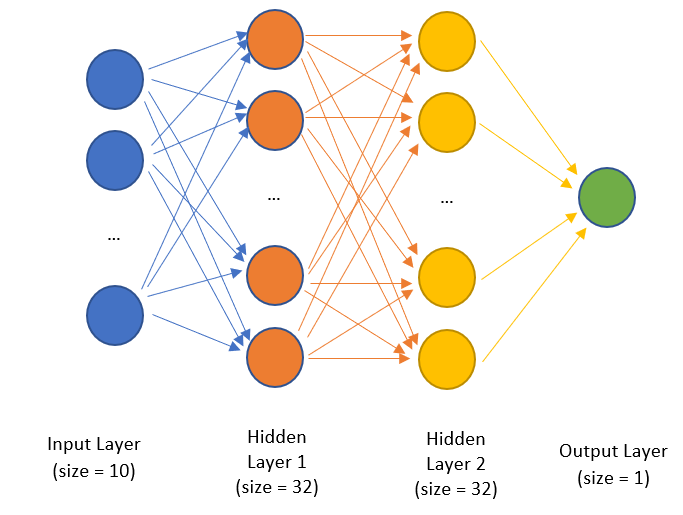

<code>In words, we want to have these layers:</code>
* Hidden layer 1: 32 neurons, ReLU activation
* Hidden layer 2: 32 neurons, ReLU activation
* Output Layer: 1 neuron, Sigmoid activation</code>

<code>
Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.</code>

In [15]:
# import Keras
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

<code>The code above can be interpreted like this:
</code>

<code>model = Sequential([ ... ])
This says that we will store our model in the variable ‘model’, and we’ll describe it sequentially (layer by layer) in between the square brackets.</code>

<code>
Dense(32, activation='relu', input_shape=(10,)),
We have our first layer as a dense layer with 32 neurons, ReLU activation and the input shape is 10 since we have 10 input features. Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using.
</code>
<code>
Dense(32, activation='relu'),
Our second layer is also a dense layer with 32 neurons, ReLU activation. Note that we do not have to describe the input shape since Keras can infer from the output of our first layer.
</code>

<code>
Dense(1, activation='sigmoid'),
Our third layer is a dense layer with 1 neuron, sigmoid activation.</code>

<code>And just like that, we have written our model architecture (template) in code!</code>

<strong>Second Step: Filling in the Best Numbers</strong>

<code>Now that we’ve got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by</code>
* Telling it which algorithm you want to use to do the optimization
* Telling it what loss function to use
* Telling it what other metrics you want to track apart from the loss function

<code>Configuring the model with these settings requires us to call the function model.compile, like this:</code>

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<code>We put the following settings inside the brackets after model.compile:
optimizer='sgd'
‘sgd’ refers to stochastic gradient descent (over here, it refers to mini-batch gradient descent), which we’ve seen in Intuitive Deep Learning Part 1b.
loss='binary_crossentropy'
The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
metrics=['accuracy']</code>

In [18]:
# train the data
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.6635 - accuracy: 0.7417 - val_loss: 0.6582 - val_accuracy: 0.7580
Epoch 2/100
1022/1022 [==============================] - 0s 28us/step - loss: 0.6549 - accuracy: 0.7446 - val_loss: 0.6492 - val_accuracy: 0.7717
Epoch 3/100
1022/1022 [==============================] - 0s 28us/step - loss: 0.6463 - accuracy: 0.7681 - val_loss: 0.6398 - val_accuracy: 0.7991
Epoch 4/100
1022/1022 [==============================] - 0s 28us/step - loss: 0.6374 - accuracy: 0.7759 - val_loss: 0.6298 - val_accuracy: 0.8082
Epoch 5/100
1022/1022 [==============================] - 0s 26us/step - loss: 0.6285 - accuracy: 0.7984 - val_loss: 0.6203 - val_accuracy: 0.8265
Epoch 6/100
1022/1022 [==============================] - 0s 25us/step - loss: 0.6199 - accuracy: 0.8092 - val_loss: 0.6107 - val_accuracy: 0.8311
Epoch 7/100
1022/1022 [==============================] - 0s 25us/step - los

1022/1022 [==============================] - 0s 23us/step - loss: 0.3394 - accuracy: 0.8650 - val_loss: 0.2742 - val_accuracy: 0.9178
Epoch 55/100
1022/1022 [==============================] - 0s 25us/step - loss: 0.3383 - accuracy: 0.8650 - val_loss: 0.2712 - val_accuracy: 0.9132
Epoch 56/100
1022/1022 [==============================] - 0s 22us/step - loss: 0.3361 - accuracy: 0.8640 - val_loss: 0.2688 - val_accuracy: 0.9132
Epoch 57/100
1022/1022 [==============================] - 0s 22us/step - loss: 0.3352 - accuracy: 0.8601 - val_loss: 0.2680 - val_accuracy: 0.9178
Epoch 58/100
1022/1022 [==============================] - 0s 25us/step - loss: 0.3340 - accuracy: 0.8669 - val_loss: 0.2646 - val_accuracy: 0.9178
Epoch 59/100
1022/1022 [==============================] - 0s 25us/step - loss: 0.3322 - accuracy: 0.8640 - val_loss: 0.2616 - val_accuracy: 0.9087
Epoch 60/100
1022/1022 [==============================] - 0s 23us/step - loss: 0.3309 - accuracy: 0.8630 - val_loss: 0.2607 - val_a

In [19]:
# find the accuracy of the test
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 18us/step


0.9041095972061157

<code>Summary: Coding up our first neural network required only a few lines of code:</code>
* We specify the architecture with the Keras Sequential model.
* We specify some of our settings (optimizer, loss function, metrics to track) with model.compile
* We train our model (find the best parameters for our architecture) with the training data with model.fit
* We evaluate our model on the test set with model.evaluate

<hr>
<h3>Visualizing Loss and Accuracy</h3>

In [20]:
import matplotlib.pyplot as plt

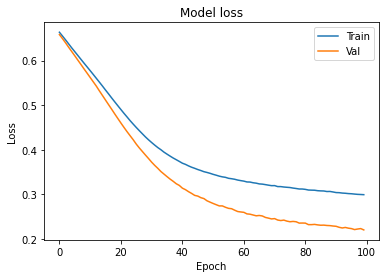

In [22]:
# plot the training loss and the validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

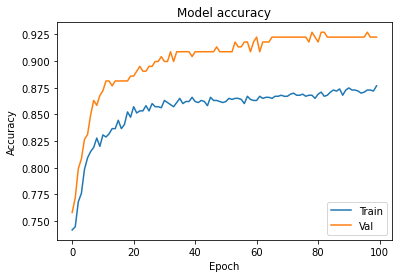

In [26]:
# plot the training accuaracy and validation accuaracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

<hr>
<h3>Adding Regularization to Neural Network</h3>

In [30]:
# neural network that badly fits over training set
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4752 - accuracy: 0.7661 - val_loss: 0.2956 - val_accuracy: 0.8950
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3515 - accuracy: 0.8425 - val_loss: 0.2391 - val_accuracy: 0.9224
Epoch 3/100
1022/1022 [==============================] - 1s 974us/step - loss: 0.3271 - accuracy: 0.8611 - val_loss: 0.2874 - val_accuracy: 0.9178
Epoch 4/100
1022/1022 [==============================] - 1s 986us/step - loss: 0.3167 - accuracy: 0.8708 - val_loss: 0.2264 - val_accuracy: 0.9178
Epoch 5/100
1022/1022 [==============================] - 1s 982us/step - loss: 0.2948 - accuracy: 0.8748 - val_loss: 0.2047 - val_accuracy: 0.9269
Epoch 6/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3007 - accuracy: 0.8718 - val_loss: 0.2394 - val_accuracy: 0.9132
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 

1022/1022 [==============================] - 1s 1ms/step - loss: 0.1883 - accuracy: 0.9168 - val_loss: 0.2472 - val_accuracy: 0.9178
Epoch 57/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1814 - accuracy: 0.9227 - val_loss: 0.2433 - val_accuracy: 0.9361
Epoch 58/100
1022/1022 [==============================] - 1s 945us/step - loss: 0.1817 - accuracy: 0.9198 - val_loss: 0.2173 - val_accuracy: 0.9269
Epoch 59/100
1022/1022 [==============================] - 1s 938us/step - loss: 0.1784 - accuracy: 0.9256 - val_loss: 0.2491 - val_accuracy: 0.9224
Epoch 60/100
1022/1022 [==============================] - 1s 941us/step - loss: 0.1827 - accuracy: 0.9247 - val_loss: 0.2061 - val_accuracy: 0.9132
Epoch 61/100
1022/1022 [==============================] - 1s 963us/step - loss: 0.1749 - accuracy: 0.9168 - val_loss: 0.2053 - val_accuracy: 0.9406
Epoch 62/100
1022/1022 [==============================] - 1s 945us/step - loss: 0.1712 - accuracy: 0.9207 - val_loss: 0.1981 - va

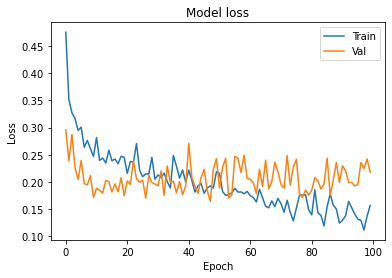

In [31]:
# plot the training loss and the validation loss
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

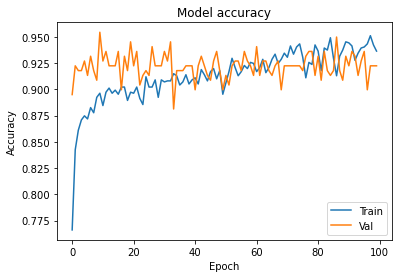

In [32]:
# plot the training accuaracy and validation accuaracy
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [33]:
# try strategies to reduce over-fitting
from keras.layers import Dropout
from keras import regularizers

In [34]:
# specify a third model
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [36]:
# compile the new model
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 14.2412 - accuracy: 0.6419 - val_loss: 3.8596 - val_accuracy: 0.8584
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 1.6985 - accuracy: 0.8131 - val_loss: 0.6364 - val_accuracy: 0.8995
Epoch 3/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5898 - accuracy: 0.8415 - val_loss: 0.4483 - val_accuracy: 0.9178
Epoch 4/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5407 - accuracy: 0.8464 - val_loss: 0.4429 - val_accuracy: 0.9087
Epoch 5/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4964 - accuracy: 0.8669 - val_loss: 0.3999 - val_accuracy: 0.9224
Epoch 6/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4964 - accuracy: 0.8669 - val_loss: 0.4002 - val_accuracy: 0.9315
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.487

1022/1022 [==============================] - 1s 1ms/step - loss: 0.4498 - accuracy: 0.8748 - val_loss: 0.3712 - val_accuracy: 0.9178
Epoch 57/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4531 - accuracy: 0.8738 - val_loss: 0.3638 - val_accuracy: 0.9178
Epoch 58/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4549 - accuracy: 0.8757 - val_loss: 0.3567 - val_accuracy: 0.9269
Epoch 59/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4608 - accuracy: 0.8777 - val_loss: 0.3676 - val_accuracy: 0.9269
Epoch 60/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4531 - accuracy: 0.8689 - val_loss: 0.3647 - val_accuracy: 0.9269
Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4552 - accuracy: 0.8659 - val_loss: 0.3577 - val_accuracy: 0.9224
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4471 - accuracy: 0.8728 - val_loss: 0.3745 - val_accuracy

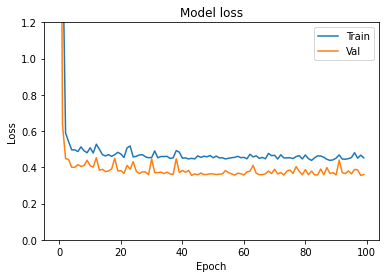

In [37]:
# plot the training loss and the validation loss
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

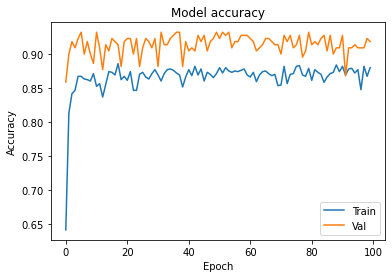

In [39]:
# plot the training accuaracy and validation accuaracy
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

<code>Summary: To deal with overfitting, we can code in the following strategies into our model each with about one line of code:</code>
* L2 Regularization
* Dropout

<code>Consolidated Summary: In this post, we’ve written Python code to:</code>
* Explore and Process the Data
* Build and Train our Neural Network
* Visualize Loss and Accuracy
* Add Regularization to our Neural Network

<hr><hr>
<h2>Build your First Convolutional Neural Network to Recognize Files</h2>

from: <code>https://medium.com/intuitive-deep-learning/build-your-first-convolutional-neural-network-to-recognize-images-84b9c78fe0ce</code>

sections and images in this program taken from this article 

<h3>Exploring and Processing the Data</h3>

<code>In this section, we’ll do the following:</code>

* Download the dataset and visualize the images
* Change the label to one-hot encodings
* Scale the image pixel values to take between 0 and 1

In [40]:
# use the CIFAR-10 dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 75s 0us/step


In [41]:
# view the shape of the imput features array
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


<code>The shape of the array tells us that our dataset x_train consists of:</code>
* 50000 images
* 32 pixels in height
* 32 pixels in width
* 3 pixels in depth (corresponding to Red, Green and Blue)

In [43]:
# shape of the label array
# 1 label for each of the 50000 images
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [44]:
# print example of an image
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


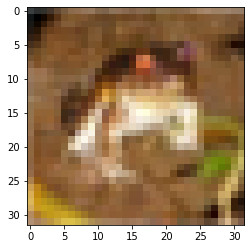

In [55]:
# visualize image using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0]);


In [56]:
# print label of image
print('The label is:', y_train[0])

The label is: [6]


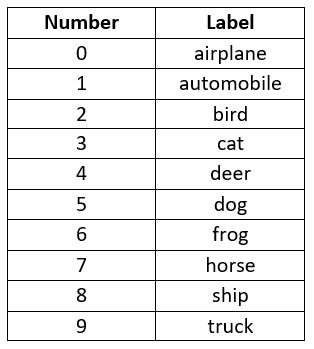

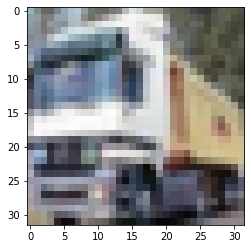

In [58]:
# another image
img = plt.imshow(x_train[1])

In [59]:
# print label of image
print('The label is:', y_train[1])

The label is: [9]


<code>convert the label into a set of 10 numbers where each number represents if the image belongs to that class or not. So if an image belongs to the first class, the first number of this set will be a 1 and all other numbers in this set will be a 0. This is called a one-hot encoding, and the conversion table now looks like this:</code>
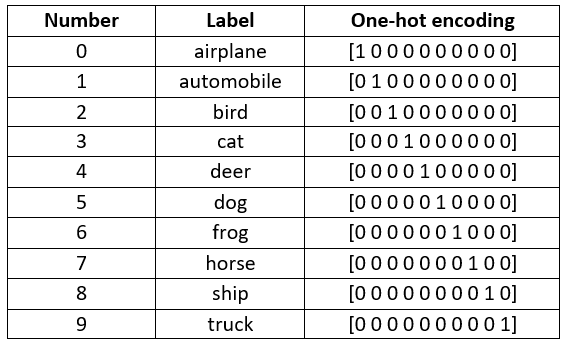

In [61]:
# the conversion in code
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [63]:
# label for second image
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


<code>Now that we’ve processed our labels (y), we might also want to process our image (x). A common step we do is to let the values to be between 0 and 1, which will aid in the training of our neural network. Since our pixel values already take the values between 0 and 255, we simply need to divide by 255.</code>

In [64]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [65]:
# print array values of first image
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

<code>Summary: In exploring and processing the data, we’ve:</code>
* Downloaded the dataset and visualize the images
* Changed the label to one-hot encodings
*  Scale the image pixel values to take between 0 and 1

<hr>
<h3> Building and Training our Convolutional Neural Network</h3>

setting up the CNN architecture
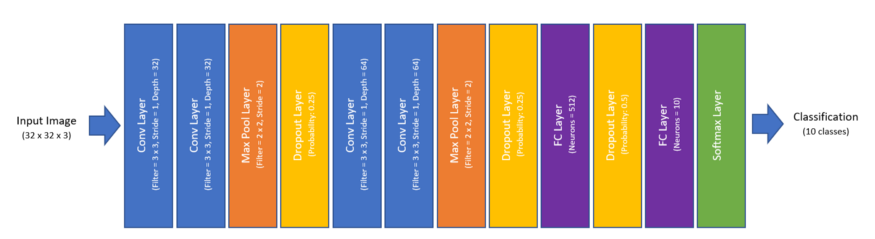

In [66]:
# use the Keras sequential model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [67]:
# call an empty sequential
model = Sequential()

In [68]:
# add empty layer one at a time
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [69]:
# second layer 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [70]:
# The next layer is a max pooling layer with pool size 2 x 2 and stride 2
model.add(MaxPooling2D(pool_size=(2, 2)))

In [71]:
# add dropout layer
model.add(Dropout(0.25))

In [72]:
# next four layers are the same  except the depth conv layer is 64 instead of 32 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [73]:
# fully connected layer
model.add(Flatten())

In [74]:
# a dense (FC) layer of 512 neurons with relu activation:
model.add(Dense(512, activation='relu'))

In [75]:
# another dropout probability
model.add(Dropout(0.5))

In [76]:
# a dense (FC) layer with 10 neurons and softmax activation:
model.add(Dense(10, activation='softmax'))

In [77]:
# view the summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

<h3>Second Step: Filling in the best numbers</h3>

In [78]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# run the training
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 107s 3ms/step - loss: 1.5268 - accuracy: 0.4400 - val_loss: 1.1887 - val_accuracy: 0.5721
Epoch 2/20
40000/40000 [==============================] - 105s 3ms/step - loss: 1.1567 - accuracy: 0.5863 - val_loss: 0.9965 - val_accuracy: 0.6369
Epoch 3/20
40000/40000 [==============================] - 104s 3ms/step - loss: 0.9861 - accuracy: 0.6538 - val_loss: 0.8567 - val_accuracy: 0.7024
Epoch 4/20
40000/40000 [==============================] - 112s 3ms/step - loss: 0.8765 - accuracy: 0.6905 - val_loss: 0.8173 - val_accuracy: 0.7137
Epoch 5/20
40000/40000 [==============================] - 112s 3ms/step - loss: 0.7999 - accuracy: 0.7171 - val_loss: 0.7990 - val_accuracy: 0.7205
Epoch 6/20
40000/40000 [==============================] - 113s 3ms/step - loss: 0.7408 - accuracy: 0.7395 - val_loss: 0.7241 - val_accuracy: 0.7493
Epoch 7/20
40000/40000 [==============================] - 117s

In [ ]:
# visualize the model training and validation loss over the number of epochs using this code
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
# visualize the accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
# evaluate the accuracy
model.evaluate(x_test, y_test_one_hot)[1]

<The shape of the array tells us that our dataset x_train consists of:

    50000 images
    32 pixels in height
    32 pixels in width
    3 pixels in depth (corresponding to Red, Green and Blue)